In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install pyfiglet
import pyfiglet

In [6]:
data=pd.read_csv('flight_data.csv')

In [7]:
data

,Unnamed: 0,Unnamed: 0.1,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,0,0,Jet Airways,Banglore,Delhi,18:55,22:00,3h 5m,non-stop,7229
1,1,1,Multiple carriers,Delhi,Cochin,10:20,01:30 22 May,15h 10m,1 stop,7485
2,2,2,IndiGo,Banglore,Delhi,18:55,21:50,2h 55m,non-stop,4823
3,3,3,Air India,Delhi,Cochin,05:55,07:40 07 Mar,25h 45m,2 stops,14641
4,4,4,SpiceJet,Kolkata,Banglore,06:55,09:30,2h 35m,non-stop,3841
...,...,...,...,...,...,...,...,...,...,...
1669,1669,1669,IndiGo,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,4423
1670,1670,1670,Jet Airways,Kolkata,Banglore,08:25,18:15,9h 50m,1 stop,10844
1671,1671,1671,Jet Airways,Delhi,Cochin,19:30,12:35 28 Jun,17h 5m,2 stops,13764
1672,1672,1672,Air India,Delhi,Cochin,23:00,19:15 10 Mar,20h 15m,1 stop,11260


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1674 non-null   int64 
 1   Unnamed: 0.1  1674 non-null   int64 
 2   Airline       1674 non-null   object
 3   Source        1674 non-null   object
 4   Destination   1674 non-null   object
 5   Dep_Time      1674 non-null   object
 6   Arrival_Time  1674 non-null   object
 7   Duration      1674 non-null   object
 8   Total_Stops   1674 non-null   object
 9   Price         1674 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 130.9+ KB


We have only one column that is numeric

In [9]:
data.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Airline         0
Source          0
Destination     0
Dep_Time        0
Arrival_Time    0
Duration        0
Total_Stops     0
Price           0
dtype: int64

In [10]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Price
count,1674.000000,1674.000000,1674.000000
mean,836.500000,836.500000,9083.091995
std,483.386491,483.386491,4475.845590
min,0.000000,0.000000,1965.000000
25%,418.250000,418.250000,5403.000000
50%,836.500000,836.500000,8529.000000
75%,1254.750000,1254.750000,12361.500000
max,1673.000000,1673.000000,57209.000000


In [12]:
data.shape

(1674, 10)

In [13]:
data.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Airline         object
Source          object
Destination     object
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
Price            int64
dtype: object

In [14]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Airline', 'Source', 'Destination',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

## DATA-PREPROCESSING

In [16]:
def preprocess1(df):
  df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
  df=df.drop(['Duration'],axis=1)
  return df
data=preprocess1(data)
data

,Unnamed: 0,Unnamed: 0.1,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price
0,0,0,Jet Airways,Banglore,Delhi,18:55,22:00,non-stop,7229
1,1,1,Multiple carriers,Delhi,Cochin,10:20,01:30 22 May,1 stop,7485
2,2,2,IndiGo,Banglore,Delhi,18:55,21:50,non-stop,4823
3,3,3,Air India,Delhi,Cochin,05:55,07:40 07 Mar,2 stops,14641
4,4,4,SpiceJet,Kolkata,Banglore,06:55,09:30,non-stop,3841
...,...,...,...,...,...,...,...,...,...
1669,1669,1669,IndiGo,Banglore,Delhi,04:00,06:50,non-stop,4423
1670,1670,1670,Jet Airways,Kolkata,Banglore,08:25,18:15,1 stop,10844
1671,1671,1671,Jet Airways,Delhi,Cochin,19:30,12:35 28 Jun,2 stops,13764
1672,1672,1672,Air India,Delhi,Cochin,23:00,19:15 10 Mar,1 stop,11260


In [17]:
def preprocess2(df):
  df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
  df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
  df=df.drop(['Dep_Time'],axis=1)
  df['arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
  df['arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
  df=df.drop(['Arrival_Time'],axis=1)
  return df
data=preprocess2(data)
data

,Unnamed: 0,Unnamed: 0.1,Airline,Source,Destination,Total_Stops,Price,Dep_hour,Dep_minute,arrival_hour,arrival_minute
0,0,0,Jet Airways,Banglore,Delhi,non-stop,7229,18,55,22,0
1,1,1,Multiple carriers,Delhi,Cochin,1 stop,7485,10,20,1,30
2,2,2,IndiGo,Banglore,Delhi,non-stop,4823,18,55,21,50
3,3,3,Air India,Delhi,Cochin,2 stops,14641,5,55,7,40
4,4,4,SpiceJet,Kolkata,Banglore,non-stop,3841,6,55,9,30
...,...,...,...,...,...,...,...,...,...,...,...
1669,1669,1669,IndiGo,Banglore,Delhi,non-stop,4423,4,0,6,50
1670,1670,1670,Jet Airways,Kolkata,Banglore,1 stop,10844,8,25,18,15
1671,1671,1671,Jet Airways,Delhi,Cochin,2 stops,13764,19,30,12,35
1672,1672,1672,Air India,Delhi,Cochin,1 stop,11260,23,0,19,15


In [18]:
def countplot(x):
  plt.figure(figsize=(12,8))
  sns.countplot(x)
  plt.xticks(rotation=90,fontsize=14)
  plt.yticks(fontsize=14)
  return plt.show()

### Countplot of Airlines

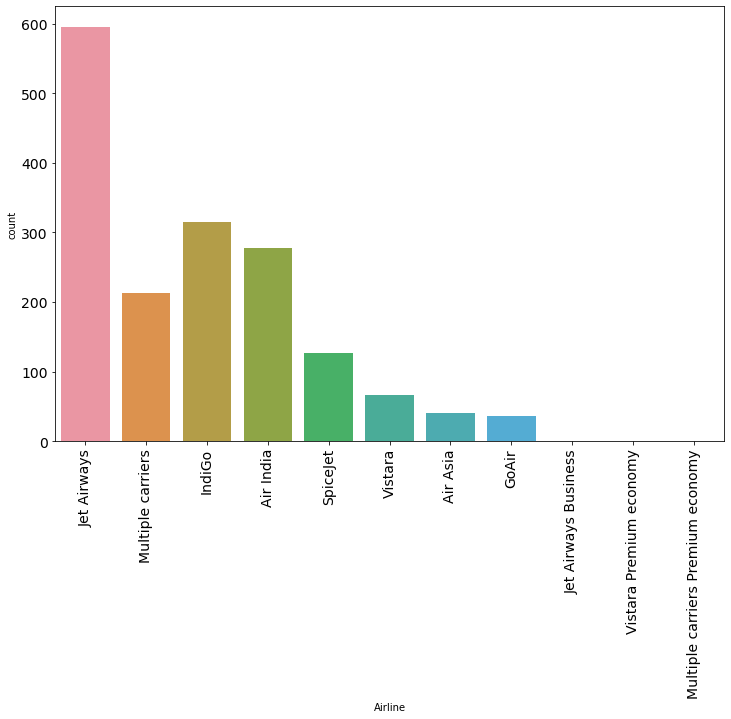

In [19]:
countplot(data['Airline'])

Maximum passengers travel with Jet Airways.

### Countplot of Source

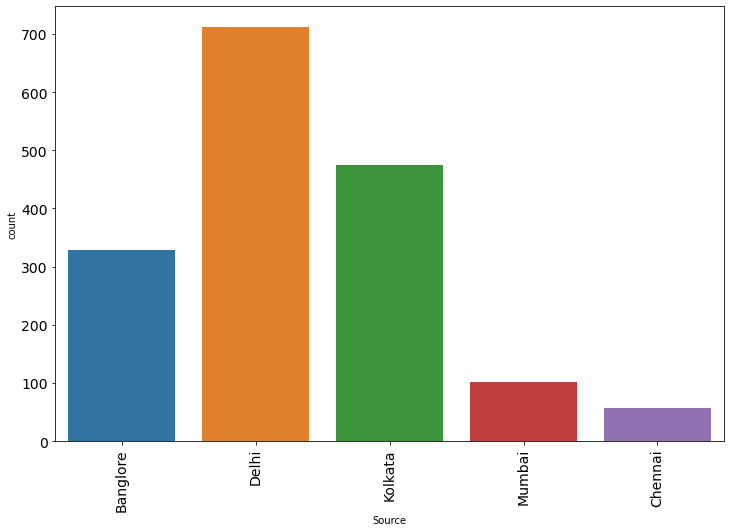

In [20]:
countplot(data['Source'])

Delhi has the maximum count.

### Countplot of Destination

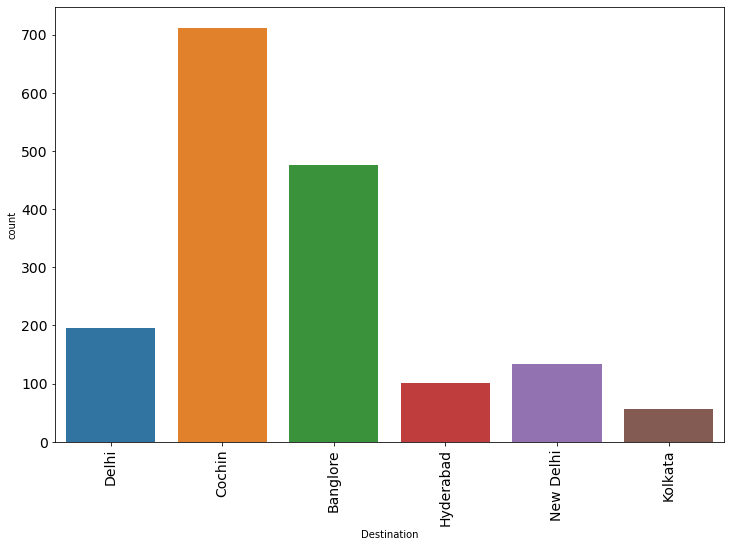

In [21]:
countplot(data['Destination'])

Maximum people are going to Cochin.

### Countplot of Total_Stops

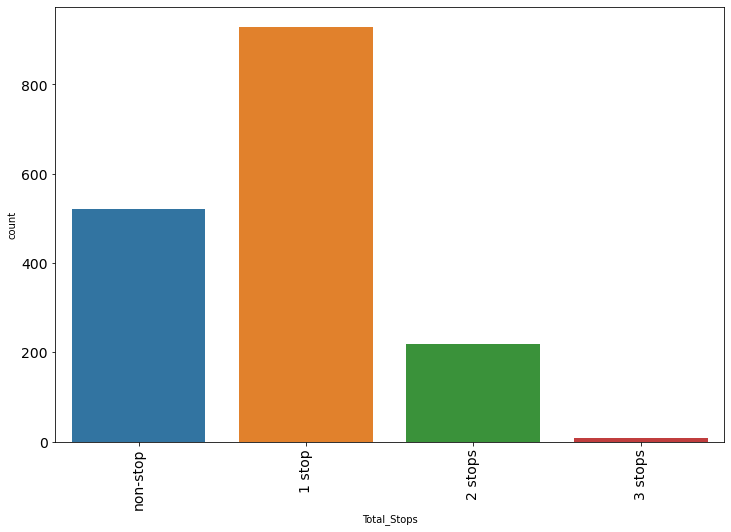

In [23]:
countplot(data['Total_Stops'])

most of the flights have only 1 stop.

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

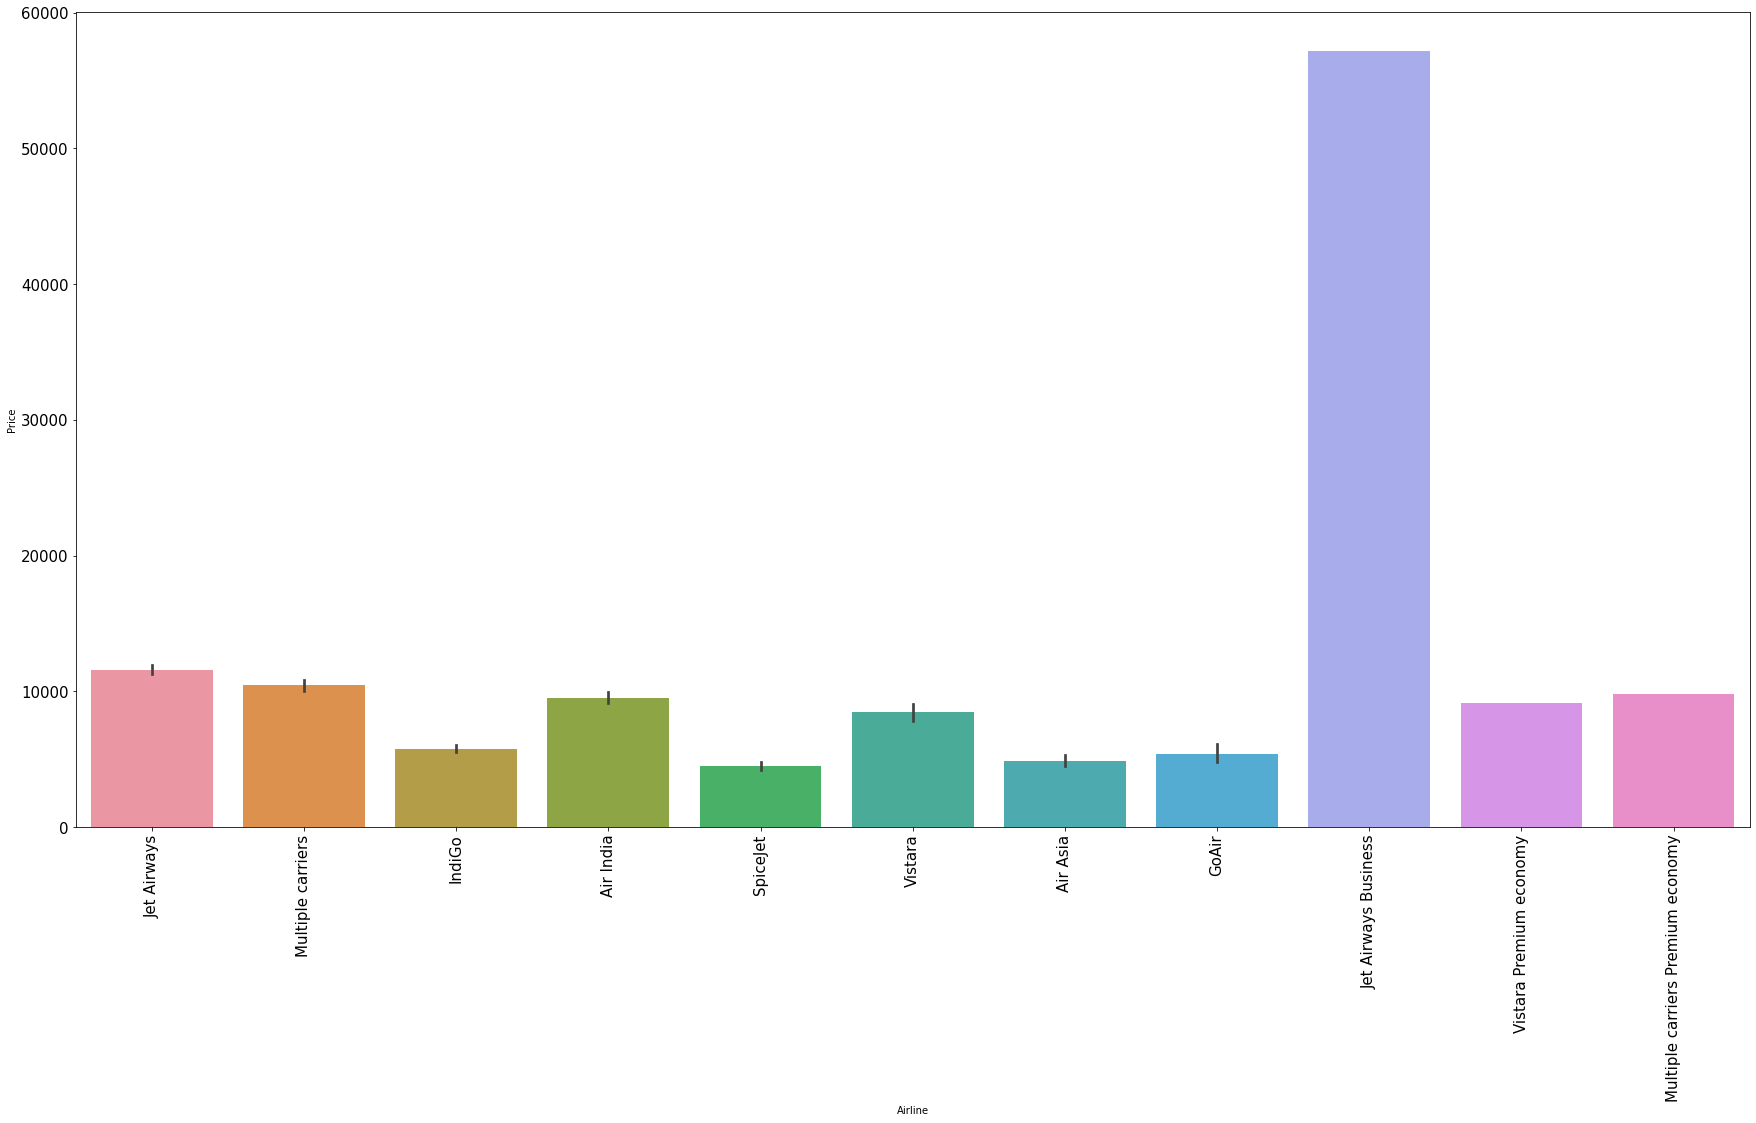

In [24]:
plt.figure(figsize=(30,15))
sns.barplot(x='Airline',y='Price',data=data)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

Jet Airways Business has the highest price.

In [25]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Airline,Source,Destination,Total_Stops,Price,Dep_hour,Dep_minute,arrival_hour,arrival_minute
0,0,0,Jet Airways,Banglore,Delhi,non-stop,7229,18,55,22,0
1,1,1,Multiple carriers,Delhi,Cochin,1 stop,7485,10,20,1,30
2,2,2,IndiGo,Banglore,Delhi,non-stop,4823,18,55,21,50
3,3,3,Air India,Delhi,Cochin,2 stops,14641,5,55,7,40
4,4,4,SpiceJet,Kolkata,Banglore,non-stop,3841,6,55,9,30


### Feature Transformation

In [26]:
oe=OrdinalEncoder()
def ordinal_encoder(df,col):
  df[col]=oe.fit_transform(df[col])
  return df

In [27]:
data=ordinal_encoder(data,['Airline','Source','Destination','Total_Stops'])

### DATA SPLITTING

<AxesSubplot:>

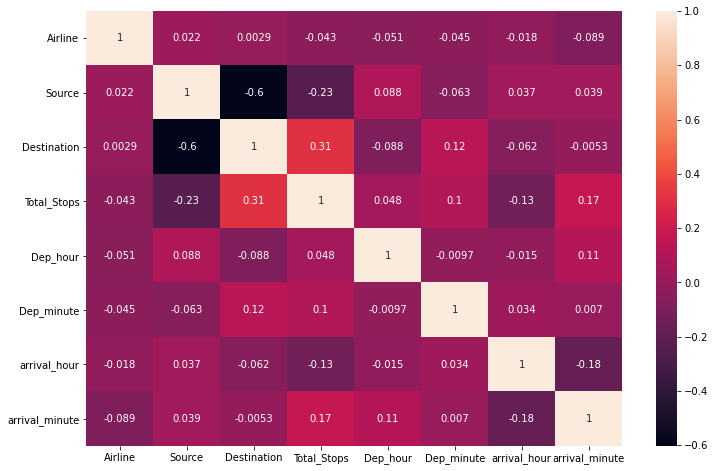

In [28]:
def preprocess3(df):
  df=df.copy()
  X=df.drop(['Price'],axis=1)
  y=df['Price']
  return X,y
X,y=preprocess3(data)
X.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(X,np.log(y),test_size=0.3,random_state=42)
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

Most of the columns have less correlation in upper graph.

# OUTLIERS

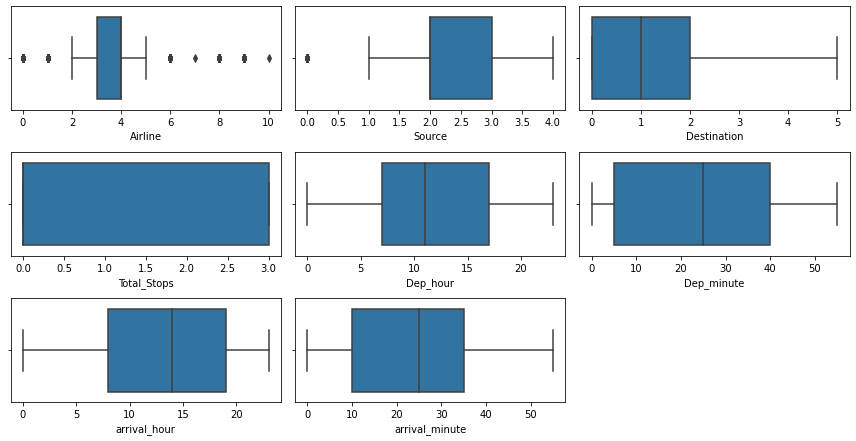

In [29]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

There is no outliers present in the data.

# SKEWNESS

In [30]:
X.skew()

Airline           0.511883
Source           -0.480290
Destination       1.311241
Total_Stops       0.643756
Dep_hour          0.194887
Dep_minute        0.183776
arrival_hour     -0.420247
arrival_minute    0.158993
dtype: float64

There is no skewness present in the data.

# Model Building

In [31]:
models={
    "XGB Regressor":XGBRegressor(),
    "ExtraTrees Regressor":ExtraTreesRegressor(),
    "RandomForest Regressor":RandomForestRegressor(),
    "Linear Regression":LinearRegression(),
    "DecisionTree Regressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "LIGHT GBM":LGBMRegressor()
}

__  ______ ____    ____                                         
\ \/ / ___| __ )  |  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
 \  / |  _|  _ \  | |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
 /  \ |_| | |_) | |  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
/_/\_\____|____/  |_| \_\___|\__, |_|  \___||___/___/\___/|_|   
                             |___/                              

MEAN SQUARED ERROR 0.078107977143037


MEAN ABSOLUTE ERROR 0.1912025403530653


CVS_SCORE 0.650748297204597


R2_SCORE 0.6890629002765949


RMSE 0.27947804411623645


MODEL PERFORMANCE CURVE


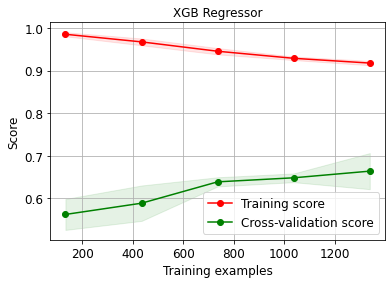

 _____      _            _____                   
| ____|_  _| |_ _ __ __ |_   _| __ ___  ___  ___ 
|  _| \ \/ / __| '__/ _` || || '__/ _ \/ _ \/ __|
| |___ >  <| |_| | | (_| || || | |  __/  __/\__ \
|_____/_/\_\\__|_|  \__,_||_||_|  \___|\___||___/
                                                 
 ____                                         
|  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
| |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
|  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
|_| \_\___|\__, |_|  \___||___/___/\___/|_|   
           |___/                              

MEAN SQUARED ERROR 0.07955321308188189


MEAN ABSOLUTE ERROR 0.18549381780594026


CVS_SCORE 0.6880438815265817


R2_SCORE 0.6833096150466172


RMSE 0.28205179148851706


MODEL PERFORMANCE CURVE


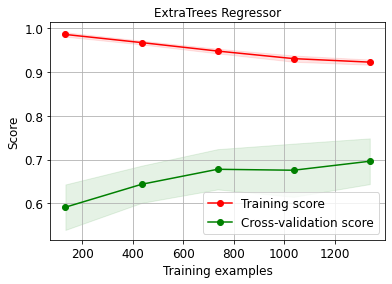

 ____                 _                 _____                   _   
|  _ \ __ _ _ __   __| | ___  _ __ ___ |  ___|__  _ __ ___  ___| |_ 
| |_) / _` | '_ \ / _` |/ _ \| '_ ` _ \| |_ / _ \| '__/ _ \/ __| __|
|  _ < (_| | | | | (_| | (_) | | | | | |  _| (_) | | |  __/\__ \ |_ 
|_| \_\__,_|_| |_|\__,_|\___/|_| |_| |_|_|  \___/|_|  \___||___/\__|
                                                                    
 ____                                         
|  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
| |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
|  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
|_| \_\___|\__, |_|  \___||___/___/\___/|_|   
           |___/                              

MEAN SQUARED ERROR 0.06672500661726857


MEAN ABSOLUTE ERROR 0.17936930108732038


CVS_SCORE 0.7100003944649341


R2_SCORE 0.734376938240193


RMSE 0.2583118398704724


MODEL PERFORMANCE CURVE


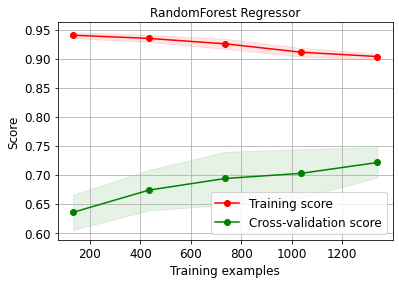

 _     _                       
| |   (_)_ __   ___  __ _ _ __ 
| |   | | '_ \ / _ \/ _` | '__|
| |___| | | | |  __/ (_| | |   
|_____|_|_| |_|\___|\__,_|_|   
                               
 ____                              _             
|  _ \ ___  __ _ _ __ ___  ___ ___(_) ___  _ __  
| |_) / _ \/ _` | '__/ _ \/ __/ __| |/ _ \| '_ \ 
|  _ <  __/ (_| | | |  __/\__ \__ \ | (_) | | | |
|_| \_\___|\__, |_|  \___||___/___/_|\___/|_| |_|
           |___/                                 

MEAN SQUARED ERROR 0.1450343456720913


MEAN ABSOLUTE ERROR 0.31072677462294684


CVS_SCORE 0.4464196337761558


R2_SCORE 0.4226382444781821


RMSE 0.38083375069981823


MODEL PERFORMANCE CURVE


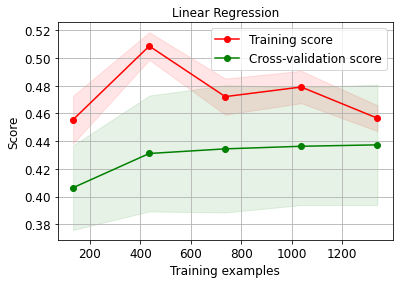

 ____            _     _           _____              
|  _ \  ___  ___(_)___(_) ___  _ _|_   _| __ ___  ___ 
| | | |/ _ \/ __| / __| |/ _ \| '_ \| || '__/ _ \/ _ \
| |_| |  __/ (__| \__ \ | (_) | | | | || | |  __/  __/
|____/ \___|\___|_|___/_|\___/|_| |_|_||_|  \___|\___|
                                                      
 ____                                         
|  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
| |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
|  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
|_| \_\___|\__, |_|  \___||___/___/\___/|_|   
           |___/                              

MEAN SQUARED ERROR 0.099347262717311


MEAN ABSOLUTE ERROR 0.20701765973686617


CVS_SCORE 0.5923356442805642


R2_SCORE 0.604512229548456


RMSE 0.3151940080606086


MODEL PERFORMANCE CURVE


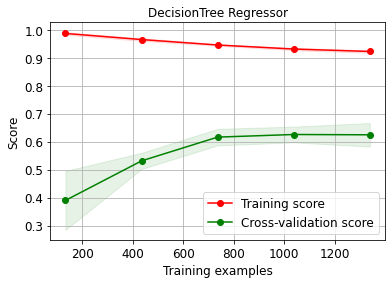

 _                        
| |    __ _ ___ ___  ___  
| |   / _` / __/ __|/ _ \ 
| |__| (_| \__ \__ \ (_) |
|_____\__,_|___/___/\___/ 
                          

MEAN SQUARED ERROR 0.25219223792388173


MEAN ABSOLUTE ERROR 0.42147797609076587


CVS_SCORE -0.002567775538554695


R2_SCORE -0.003942566444984363


RMSE 0.502187452973371


MODEL PERFORMANCE CURVE


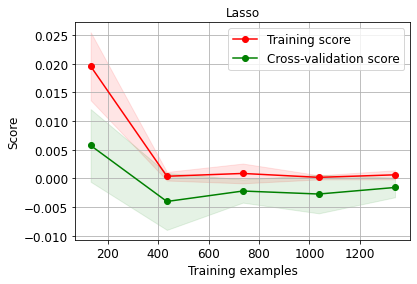

 _     ___ ____ _   _ _____    ____ ____  __  __ 
| |   |_ _/ ___| | | |_   _|  / ___| __ )|  \/  |
| |    | | |  _| |_| | | |   | |  _|  _ \| |\/| |
| |___ | | |_| |  _  | | |   | |_| | |_) | |  | |
|_____|___\____|_| |_| |_|    \____|____/|_|  |_|
                                                 

MEAN SQUARED ERROR 0.06780527033441756


MEAN ABSOLUTE ERROR 0.18596436927896234


CVS_SCORE 0.7118519667073924


R2_SCORE 0.730076557159633


RMSE 0.2603944514278627


MODEL PERFORMANCE CURVE


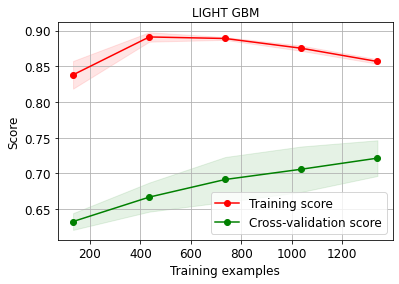

In [32]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  font=pyfiglet.figlet_format(name)
  print(font)
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X,np.log(y),scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X,np.log(y),cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [34]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})
models_result

,NAME,Cross_Val_Score,R2_score,Mean_squared_error,Mean_Absolute_Error,RMSE
0,XGB Regressor,0.650748,0.689063,0.078108,0.191203,0.279478
1,ExtraTrees Regressor,0.688044,0.683310,0.079553,0.185494,0.282052
2,RandomForest Regressor,0.710000,0.734377,0.066725,0.179369,0.258312
3,Linear Regression,0.446420,0.422638,0.145034,0.310727,0.380834
4,DecisionTree Regressor,0.592336,0.604512,0.099347,0.207018,0.315194
5,Lasso,-0.002568,-0.003943,0.252192,0.421478,0.502187
6,LIGHT GBM,0.711852,0.730077,0.067805,0.185964,0.260394


In [35]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# Hyperparameter Tuning

In [37]:
params={
    'booster':['gbtree','dart'],
    'importance_type':['gain','split'],
    'max_depth':[3,4,6,5,7],
    'n_estimators':[100,200,500]
}
Grid=GridSearchCV(estimator=XGB,param_grid=params,cv=kf,n_jobs=-1,scoring='r2')
Grid.fit(X,np.log(y))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
          

In [38]:
Grid.best_params_

{'booster': 'gbtree',
 'importance_type': 'gain',
 'max_depth': 3,
 'n_estimators': 100}

In [39]:
Grid.best_score_

0.7159611434643521

In [40]:
XGBR=XGBRegressor(booster= 'dart',
 importance_type= 'gain',
 max_depth= 7,
 n_estimators= 200)
XGBR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# FINAL MODEL

MODEL PERFORMANCE CURVE


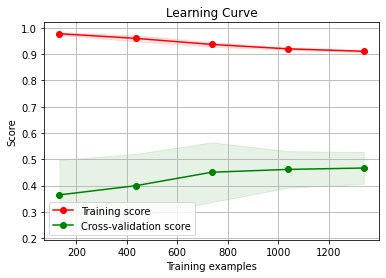

In [41]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(XGBR,X,y,cv=kf,scoring='r2')
plt.show()

In [42]:
y_pred=XGBR.predict(X_test)

# FINAL MODEL METRICS

In [43]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_Score",r2_score(y_test,y_pred))
print("Model_Score",XGBR.score(X_test,y_test))

MSE 0.08195270738588471
MAE 0.19439573996960813
RMSE 0.2862738328696577
R2_Score 0.6737575586884916
Model_Score 0.6737575586884916


In [45]:
import joblib
joblib.dump(Grid,"Flight_Pred.obj")

['Flight_Pred.obj']

In [47]:
model=joblib.load('Flight_Pred.obj')

In [48]:
np.exp(model.predict(X_test))

array([13713.74  , 10738.047 ,  3432.3904,  6879.904 ,  4128.842 ,
       11115.283 , 11423.987 ,  4033.086 , 11212.412 , 11981.567 ,
       13096.8545, 11215.46  ,  2822.3022,  4913.274 ,  9805.761 ,
       12845.498 , 11215.46  ,  7319.87  ,  5752.34  , 11330.859 ,
       13876.161 ,  4693.4814, 11396.261 , 11533.83  ,  5178.19  ,
        8813.792 ,  4415.7705,  3731.1404, 10515.011 ,  8662.843 ,
        3928.4116, 11198.21  , 10620.873 ,  5112.7056, 13369.375 ,
        5178.19  , 11357.1045,  5512.517 , 10711.863 , 11532.29  ,
        9719.724 ,  6572.4614,  5957.486 ,  6520.8853,  6138.887 ,
        5221.8   , 12025.411 , 13123.272 , 12727.398 , 12535.266 ,
       11488.316 , 10036.68  ,  3526.857 ,  4271.903 , 10149.335 ,
        7714.097 ,  2728.9758,  5928.7275, 14584.744 , 11366.055 ,
       15604.84  , 14281.605 ,  4772.8657, 11516.431 , 10190.953 ,
       13876.161 , 12995.343 ,  3883.6257, 10390.099 , 10278.055 ,
        4691.9688, 13454.83  ,  9224.169 , 11776.882 ,  6455.8

# THANKYOU